In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
import glob
import os

path = r"C:\sachin\Python\Human Resource Management"
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f, encoding="latin1") for f in all_files), ignore_index=True)

In [101]:
df.head(3)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Total - Persons,Main Workers - Rural - Persons,Main Workers - Urban - Persons,Marginal Workers - Total - Persons,Marginal Workers - Rural - Persons,Marginal Workers - Urban - Persons,Industry_Cluster,Male_Female_Ratio,Rural_Urban_Ratio,NIC_encoded
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980.0,708129,120851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484.0,1271,213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169.0,151,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369756 entries, 0 to 369755
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   State Code                           369756 non-null  object 
 1   District Code                        369756 non-null  object 
 2   India/States                         369756 non-null  object 
 3   Division                             369756 non-null  object 
 4   Group                                369756 non-null  object 
 5   Class                                369756 non-null  object 
 6   NIC Name                             369756 non-null  object 
 7   Main Workers - Total -  Persons      184878 non-null  float64
 8   Main Workers - Total - Males         369756 non-null  int64  
 9   Main Workers - Total - Females       369756 non-null  int64  
 10  Main Workers - Rural -  Persons      184878 non-null  float64
 11  Main Workers 

### Data Cleaning 

In [103]:
df.isnull().sum()

State Code                                  0
District Code                               0
India/States                                0
Division                                    0
Group                                       0
Class                                       0
NIC Name                                    0
Main Workers - Total -  Persons        184878
Main Workers - Total - Males                0
Main Workers - Total - Females              0
Main Workers - Rural -  Persons        184878
Main Workers - Rural - Males                0
Main Workers - Rural - Females              0
Main Workers - Urban -  Persons        184878
Main Workers - Urban - Males                0
Main Workers - Urban - Females              0
Marginal Workers - Total -  Persons    184878
Marginal Workers - Total - Males            0
Marginal Workers - Total - Females          0
Marginal Workers - Rural -  Persons    184878
Marginal Workers - Rural - Males            0
Marginal Workers - Rural - Females

In [17]:
df.dtypes

State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                                  object
Class                                  object
NIC Name                               object
Main Workers - Total -  Persons         int64
Main Workers - Total - Males            int64
Main Workers - Total - Females          int64
Main Workers - Rural -  Persons         int64
Main Workers - Rural - Males            int64
Main Workers - Rural - Females          int64
Main Workers - Urban -  Persons         int64
Main Workers - Urban - Males            int64
Main Workers - Urban - Females          int64
Marginal Workers - Total -  Persons     int64
Marginal Workers - Total - Males        int64
Marginal Workers - Total - Females      int64
Marginal Workers - Rural -  Persons     int64
Marginal Workers - Rural - Males        int64
Marginal Workers - Rural - Females

In [18]:
# Remove backticks (`) and convert to integer
df["State Code"] = df["State Code"].str.replace("`", "").astype(int)
df["District Code"] = df["District Code"].str.replace("`", "").astype(int)
df["Division"] = df["Division"].str.replace("`", "").astype(int)
df["Group"] = df["Group"].str.replace("`", "").astype(int)
df["Class"] = df["Class"].str.replace("`", "").astype(int)

In [19]:
 # lebel encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df["India/States"] = le.fit_transform(df["India/States"])
# df["NIC Name"] = le.fit_transform(df["NIC Name"])

### EDA

In [20]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [21]:
# Clean column names: strip & replace multiple spaces with single
df.columns = df.columns.str.replace(r"\s+", " ", regex=True).str.strip()

worker_columns = [
    "Main Workers - Total - Persons",
    "Main Workers - Total - Males",
    "Main Workers - Total - Females",
    "Marginal Workers - Total - Persons",
    "Marginal Workers - Total - Males",
    "Marginal Workers - Total - Females"
]

print("\nSummary Statistics of Worker Counts:")
print(df[worker_columns].describe())



Summary Statistics of Worker Counts:
       Main Workers - Total - Persons  Main Workers - Total - Males  \
count                    1.848780e+05                  1.848780e+05   
mean                     1.562309e+03                  1.250517e+03   
std                      4.692604e+04                  3.876860e+04   
min                      0.000000e+00                  0.000000e+00   
25%                      6.000000e+00                  6.000000e+00   
50%                      3.000000e+01                  2.400000e+01   
75%                      2.000000e+02                  1.540000e+02   
max                      1.561976e+07                  1.280140e+07   

       Main Workers - Total - Females  Marginal Workers - Total - Persons  \
count                    1.848780e+05                        1.848780e+05   
mean                     3.117920e+02                        3.782976e+02   
std                      8.813536e+03                        1.208429e+04   
min           

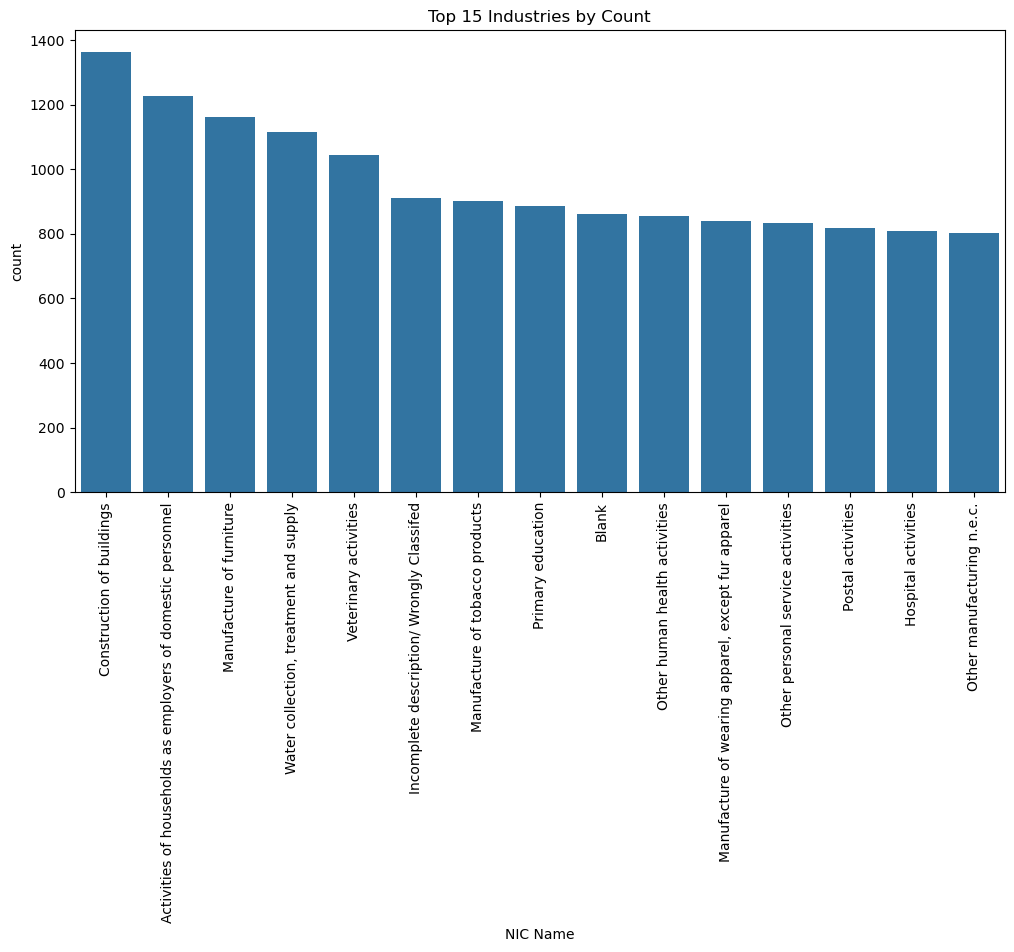

In [22]:
# Distribution of industries (NIC Name)
plt.figure(figsize=(12,6))
sns.countplot(x="NIC Name", data=df, order=df["NIC Name"].value_counts().index[:15])  # Top 15 for readability
plt.title("Top 15 Industries by Count")
plt.xticks(rotation=90)
plt.show()

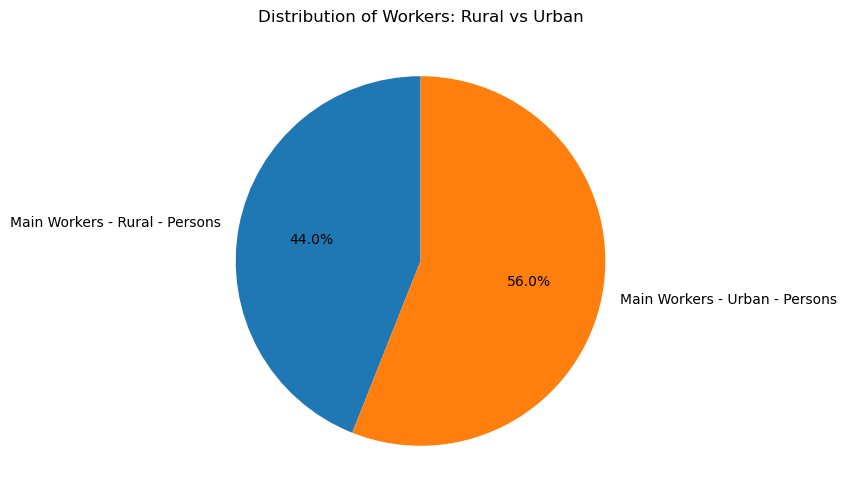

In [23]:
#  Workers by Rural vs Urban
rural_urban_cols = [
    "Main Workers - Rural - Persons", "Main Workers - Urban - Persons"
]

df_rural_urban = df[rural_urban_cols].sum().reset_index()
df_rural_urban.columns = ["Category", "Count"]

plt.figure(figsize=(6,6))
plt.pie(df_rural_urban["Count"], labels=df_rural_urban["Category"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Workers: Rural vs Urban")
plt.show()


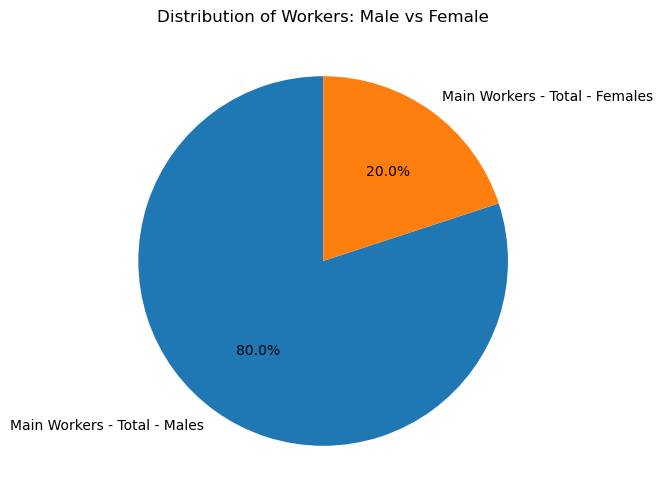

In [24]:
# Workers by Male vs Female
male_female_cols = [
    "Main Workers - Total - Males", "Main Workers - Total - Females"
]

df_male_female = df[male_female_cols].sum().reset_index()
df_male_female.columns = ["Category", "Count"]

plt.figure(figsize=(6,6))
plt.pie(df_male_female["Count"], labels=df_male_female["Category"], autopct="%1.1f%%", startangle=90, colors=["#1f77b4", "#ff7f0e"])
plt.title("Distribution of Workers: Male vs Female")
plt.show()


###  Feature Engineering ###

In [25]:
#  Aggregate workers by industry group (NIC Name)
industry_group_agg = df.groupby("NIC Name")[
    [
        "Main Workers - Total - Persons",
        "Main Workers - Total - Males",
        "Main Workers - Total - Females",
        "Main Workers - Rural - Persons",
        "Main Workers - Urban - Persons"
    ]
].sum().reset_index()

In [26]:
#  Create Male/Female worker ratio
industry_group_agg["Male_Female_Ratio"] = (
    industry_group_agg["Main Workers - Total - Males"] /
    (industry_group_agg["Main Workers - Total - Females"] + 1e-6) 
)

In [27]:
#  Create Rural/Urban worker ratio
industry_group_agg["Rural_Urban_Ratio"] = (
    industry_group_agg["Main Workers - Rural - Persons"] /
    (industry_group_agg["Main Workers - Urban - Persons"] + 1e-6)
)

print("Aggregated Data with Ratios (Head):")
print(industry_group_agg.head())

Aggregated Data with Ratios (Head):
                                            NIC Name  \
0                                      Accommodation   
1  Accounting, bookkeeping and auditing activitie...   
2  Activities auxiliary to financial service acti...   
3  Activities auxiliary to financial service acti...   
4  Activities auxiliary to insurance and pension ...   

   Main Workers - Total - Persons  Main Workers - Total - Males  \
0                          512234                        441046   
1                          165532                        151872   
2                            2832                          2532   
3                            7838                          7134   
4                          137560                        121934   

   Main Workers - Total - Females  Main Workers - Rural - Persons  \
0                           71188                          205294   
1                           13660                           35892   
2                

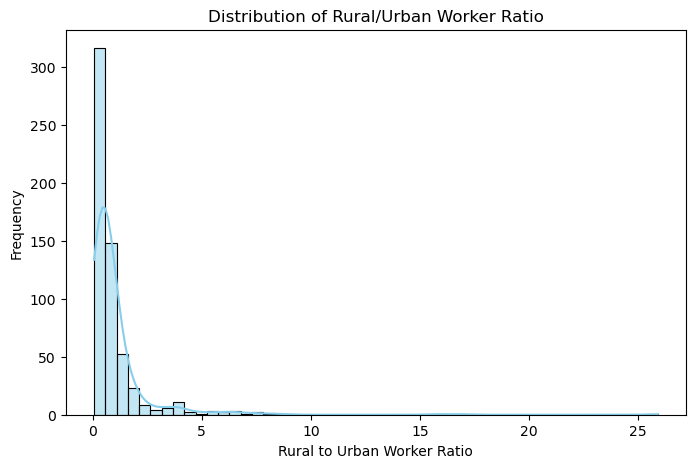

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(industry_group_agg["Rural_Urban_Ratio"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Rural/Urban Worker Ratio")
plt.xlabel("Rural to Urban Worker Ratio")
plt.ylabel("Frequency")
plt.show()

C:\Users\Sachin Hembram\AppData\Local\Temp\ipykernel_6428\2753364363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


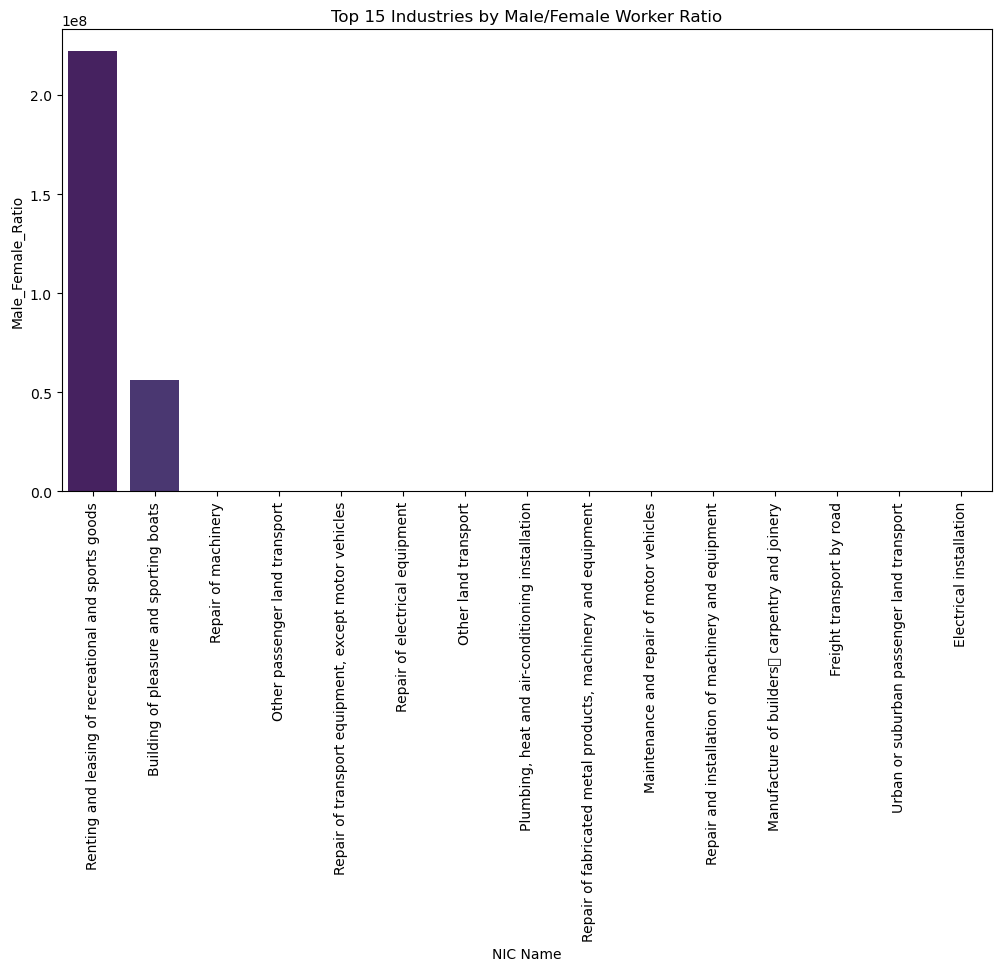

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(
    x="NIC Name",
    y="Male_Female_Ratio",
    data=industry_group_agg.sort_values("Male_Female_Ratio", ascending=False).head(15),
    palette="viridis"
)
plt.title("Top 15 Industries by Male/Female Worker Ratio")
plt.xticks(rotation=90)
plt.show()


### Keyword Mapping (Rule-based)

In [ ]:
# #Keyword Mapping for Industry Grouping

# def map_industry_group(name):
#     name = name.lower()
#     if any(word in name for word in ["rice", "crop", "farming", "agriculture", "cultivation", "plantation"]):
#         return "Agriculture"
#     elif any(word in name for word in ["retail", "wholesale", "trade", "shop"]):
#         return "Retail"
#     elif any(word in name for word in ["poultry", "dairy", "livestock", "cattle", "goat", "pig", "fishery"]):
#         return "Poultry/Livestock"
#     elif any(word in name for word in ["manufacturing", "textiles", "processing", "factory", "production"]):
#         return "Manufacturing"
#     else:
#         return "Other"

# df["Industry_Group"] = df["NIC Name"].astype(str).apply(map_industry_group)
# print(df[["NIC Name", "Industry_Group"]].head(20))


### TF-IDF + Clustering (Unsupervised NLP)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

texts = df["NIC Name"]

#  TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf.fit_transform(texts)

In [31]:
#  KMeans Clustering
k = 4  # number of high-level groups you expect (Agriculture, Retail, Poultry, Manufacturing)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Industry_Cluster"] = kmeans.fit_predict(X_tfidf)

print(df[["NIC Name", "Industry_Cluster"]].head(100))

C:\Users\Sachin Hembram\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Sachin Hembram\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in

                                             NIC Name  Industry_Cluster
0                                               Total                 3
1   Crop and animal production, hunting and relate...                 2
2                      Growing of non-perennial crops                 3
3   Growing of cereals (except rice), leguminous c...                 3
4                                     Growing of rice                 3
..                                                ...               ...
95                               Manufacture of wines                 1
96               Manufacture of malt liquors and malt                 3
97  Manufacture of soft drinks; production of mine...                 1
98                    Manufacture of tobacco products                 1
99                    Manufacture of tobacco products                 1

[100 rows x 2 columns]


In [32]:
# Inspect cluster top keywords
terms = tfidf.get_feature_names_out()
for i in range(k):
    cluster_terms = X_tfidf[df["Industry_Cluster"] == i].sum(axis=0)
    top_indices = cluster_terms.A1.argsort()[-10:][::-1]
    top_words = [terms[idx] for idx in top_indices]
    print(f"Cluster {i}: {top_words}")


Cluster 0: ['retail', 'sale', 'specialized', 'stores', 'stalls', 'markets', 'trade', 'goods', 'non', 'wholesale']
Cluster 1: ['manufacture', 'products', 'equipment', 'machinery', 'apparel', 'metal', 'furniture', 'articles', 'chemical', 'textiles']
Cluster 2: ['activities', 'service', 'support', 'telecommunications', 'organizations', 'security', 'related', 'accommodation', 'social', 'transportation']
Cluster 3: ['education', 'repair', 'transport', 'construction', 'wholesale', 'equipment', 'mining', 'household', 'goods', 'water']


In [55]:
# # Merge ratios from aggregated data back to the main df
# df = df.merge(
#     industry_group_agg[["NIC Name", "Male_Female_Ratio", "Rural_Urban_Ratio"]],
#     on="NIC Name",
#     how="left"
# )

### Classification – Predict Industry Group

In [58]:
from sklearn.model_selection import train_test_split

# Features 
features = [
    "State Code", "District Code", "Division", "Group", "Class",
    "Main Workers - Rural - Persons", "Main Workers - Urban - Persons"

]

X = df[features]

y = df["Industry_Cluster"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [96]:
df["Industry_Cluster"].value_counts().head(10)

Industry_Cluster
3    72797
2    54913
1    43931
0    13237
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler

# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [98]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

MemoryError: could not allocate 8135901184 bytes

In [63]:
# SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))  

SVM Accuracy: 0.694883167459974


In [64]:
# Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr)) 

Logistic Regression Accuracy: 0.49559173517957594


### Regression – Predict Number of Workers

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
feature = [
    "State Code",          
    "District Code",      
    "Division",            
    "Group",               
    "Class",             
    "Main Workers - Rural - Persons",   
    "Main Workers - Urban - Persons",   
    "Male_Female_Ratio", 
    "Rural_Urban_Ratio"   
]


In [106]:
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Total - Persons,Main Workers - Rural - Persons,Main Workers - Urban - Persons,Marginal Workers - Total - Persons,Marginal Workers - Rural - Persons,Marginal Workers - Urban - Persons,Industry_Cluster,Male_Female_Ratio,Rural_Urban_Ratio,NIC_encoded
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980.0,708129,120851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484.0,1271,213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169.0,151,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83.0,81,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9.0,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369751,19,345,District - Purba Medinipur,99,990,9900,Activities of extraterritorial organizations a...,NaN,12,6,...,18.0,0.0,18.0,0.0,0.0,0.0,2.0,1.320544,0.919853,11.0
369752,19,345,District - Purba Medinipur,99,991,0,Blank,NaN,5866,2378,...,8244.0,5592.0,2652.0,25591.0,22057.0,3534.0,3.0,1.634548,0.836489,36.0
369753,19,345,District - Purba Medinipur,99,991,9910,Blank,NaN,5866,2378,...,8244.0,5592.0,2652.0,25591.0,22057.0,3534.0,3.0,1.634548,0.836489,36.0
369754,19,345,District - Purba Medinipur,99,992,0,Incomplete description/ Wrongly Classifed,NaN,4604,3720,...,8324.0,6762.0,1562.0,14872.0,13204.0,1668.0,3.0,0.907440,1.088117,139.0


In [83]:
# Features
x = df[feature]
Y = df["Main Workers - Total - Persons"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [84]:
#  Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))

Linear Regression R2: 1.0
Linear Regression RMSE: 2.408536922849672e-10


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [85]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest R2: 0.6780618652031078
Random Forest RMSE: 46832.29952333266


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
#  XGBoost Regressor
xg_reg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))


XGBoost R2: 0.7233719825744629
XGBoost RMSE: 43411.749580452226


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [87]:
import xgboost as xgb
#  XGBoost Regressor
xg_reg = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))

XGBoost R2: 0.7281758785247803
XGBoost RMSE: 43033.16163041826


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# pip install lightgbm

In [88]:
import lightgbm as lgb
#  LightGBM Regressor
lgb_reg = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_reg.fit(X_train, y_train)
y_pred_lgb = lgb_reg.predict(X_test)

print("LightGBM R2:", r2_score(y_test, y_pred_lgb))
print("LightGBM RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1850
[LightGBM] [Info] Number of data points in the train set: 147902, number of used features: 9
[LightGBM] [Info] Start training from score 1520.389008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# pip install catboost


In [ ]:
df.to_csv("processed_hr_data.csv", index=False)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,Industry_Cluster,Male_Female_Ratio,Rural_Urban_Ratio
0,7,0,STATE - NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,16266,1969,1494,475,59040,43249,15791,3,4.010741,0.784962
1,7,0,STATE - NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,74,23,13,10,201,137,64,2,1.321820,4.397066
2,7,0,STATE - NCT OF DELHI,1,11,0,Growing of non-perennial crops,169,151,18,...,27,14,12,2,78,53,25,3,3.569088,1.478074
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,10,8,6,2,29,21,8,3,3.320050,1.459373
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,3,4.168758,1.485603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184873,19,345,District - Purba Medinipur,99,990,9900,Activities of extraterritorial organizations a...,18,12,6,...,0,0,0,0,0,0,0,2,1.320544,0.919853
184874,19,345,District - Purba Medinipur,99,991,0,Blank,8244,5866,2378,...,17103,22057,7272,14785,3534,1216,2318,3,1.634548,0.836489
184875,19,345,District - Purba Medinipur,99,991,9910,Blank,8244,5866,2378,...,17103,22057,7272,14785,3534,1216,2318,3,1.634548,0.836489
184876,19,345,District - Purba Medinipur,99,992,0,Incomplete description/ Wrongly Classifed,8324,4604,3720,...,11520,13204,2934,10270,1668,418,1250,3,0.907440,1.088117


In [ ]:
# ✅ Save the actual scaler object
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [105]:
# save best classifier model
joblib.dump(rf, "rf_classifier_model.pkl")

#save best regressor model
joblib.dump(lr, "lr_regressor_model.pkl")

['lr_regressor_model.pkl']